## Written by : Kumar Kaustubh

The provided code demonstrates a Python function named `plot_waveform_and_spectrogram` that uses the librosa library to generate waveforms and spectrograms for two audio files: one from a depressed speaker and another from a non-depressed speaker. The function utilizes functions from librosa, matplotlib.pyplot, and numpy to load the audio files, normalize the waveforms, calculate spectrograms using Short-Time Fourier Transform (STFT), and plot the waveforms and spectrograms in a 2x2 subplot figure. The resulting plots display the waveforms and spectrograms for both the depressed and non-depressed audio files. The code showcases how librosa can be used to visualize and analyze audio signals in the form of waveforms and spectrograms, providing insights into the frequency content and characteristics of the audio recordings.

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


C:\Users\Kumar Kaustubh\AppData\Roaming\Python\Python39\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


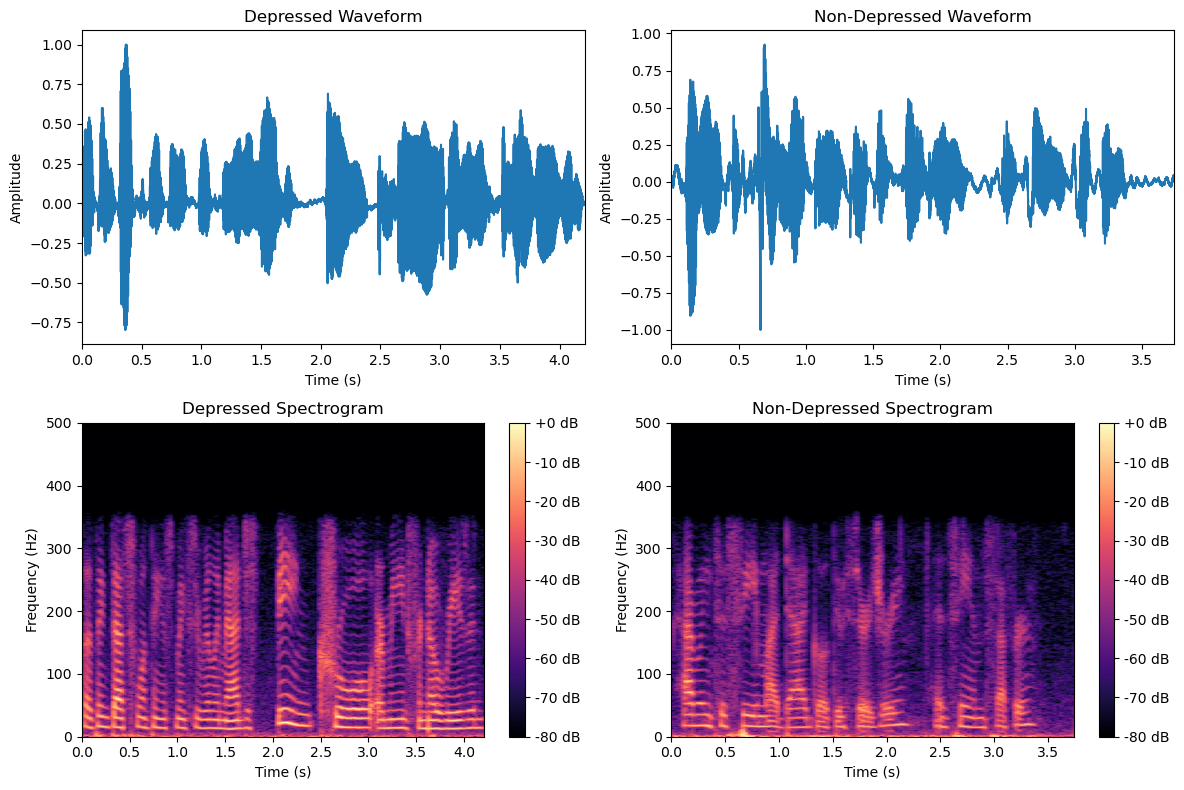

In [2]:

def plot_waveform_and_spectrogram(depressed_file, non_depressed_file):
    # Load audio files
    depressed_audio, sr = librosa.load(depressed_file)
    non_depressed_audio, _ = librosa.load(non_depressed_file)

    # Normalize waveform between -1 and 1
    depressed_audio /= np.max(np.abs(depressed_audio))
    non_depressed_audio /= np.max(np.abs(non_depressed_audio))

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Calculate spectrograms
    depressed_spec = librosa.amplitude_to_db(librosa.stft(depressed_audio), ref=np.max)[:500, :]
    non_depressed_spec = librosa.amplitude_to_db(librosa.stft(non_depressed_audio), ref=np.max)[:500, :]

    # Plot depressed waveform
    axs[0, 0].set_title('Depressed Waveform')
    axs[0, 0].plot(np.arange(len(depressed_audio)) / sr, depressed_audio)
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Amplitude')
    axs[0, 0].set_xlim([0, len(depressed_audio) / sr])

    # Plot non-depressed waveform
    axs[0, 1].set_title('Non-Depressed Waveform')
    axs[0, 1].plot(np.arange(len(non_depressed_audio)) / sr, non_depressed_audio)
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Amplitude')
    axs[0, 1].set_xlim([0, len(non_depressed_audio) / sr])

    # Plot depressed spectrogram
    axs[1, 0].set_title('Depressed Spectrogram')
    im1 = axs[1, 0].imshow(depressed_spec, aspect='auto', origin='lower', cmap='magma', extent=[0, len(depressed_audio) / sr, 0, 500])
    plt.colorbar(im1, ax=axs[1, 0], format='%+2.0f dB')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('Frequency (Hz)')

    # Plot non-depressed spectrogram
    axs[1, 1].set_title('Non-Depressed Spectrogram')
    im2 = axs[1, 1].imshow(non_depressed_spec, aspect='auto', origin='lower', cmap='magma', extent=[0, len(non_depressed_audio) / sr, 0, 500])
    plt.colorbar(im2, ax=axs[1, 1], format='%+2.0f dB')
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('Frequency (Hz)')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
depressed_file = 'D_S_ND.wav'
non_depressed_file = 'ND_S_D.wav'
plot_waveform_and_spectrogram(depressed_file, non_depressed_file)
